In [ ]:
import pandas as pd

# Load the sales dataset from UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

# Display the first few rows of the dataset
print(df.head())

# Display the structure of the dataset
print(df.info())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Filter for positive quantities and unit prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Create a new feature for Total Price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Aggregate data by Customer ID
customer_data = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customer_data[['Quantity', 'TotalPrice']] = scaler.fit_transform(customer_data[['Quantity', 'TotalPrice']])

# Display the cleaned and normalized data
print(customer_data.head())


<ipython-input-10-e6b92ed3a55d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


   CustomerID   Quantity  TotalPrice
0     12346.0  14.473038    8.358668
1     12347.0   0.251058    0.250966
2     12348.0   0.227869   -0.028596
3     12349.0  -0.111047   -0.033012
4     12350.0  -0.197065   -0.191347


In [ ]:
from sklearn.cluster import KMeans

# Choose the number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model and predict clusters
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['Quantity', 'TotalPrice']])

# Display the clustered data
print(customer_data.head())

   CustomerID   Quantity  TotalPrice  Cluster
0     12346.0  14.473038    8.358668        2
1     12347.0   0.251058    0.250966        0
2     12348.0   0.227869   -0.028596        0
3     12349.0  -0.111047   -0.033012        0
4     12350.0  -0.197065   -0.191347        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


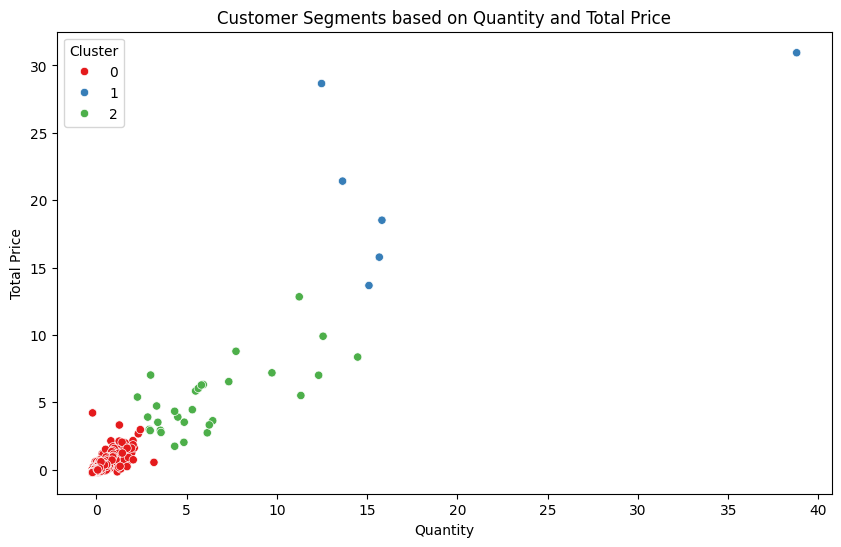

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot clusters based on Quantity and Total Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='TotalPrice', hue='Cluster', data=customer_data, palette='Set1')
plt.title('Customer Segments based on Quantity and Total Price')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()


In [ ]:
# Analyze the characteristics of each cluster
cluster_analysis = customer_data.groupby('Cluster').mean()
print(cluster_analysis)

           CustomerID   Quantity  TotalPrice
Cluster                                     
0        15301.328684  -0.068809   -0.066327
1        15661.666667  18.581583   21.496728
2        15096.133333   6.150916    5.211962
